In [15]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

# --- 데이터 로드 및 전처리 ---
df = pd.read_csv('BP_data.csv')
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [16]:
# Pregnancy 처리
df['Pregnancy'] = df.apply(lambda row: 0 if row['Sex'] == 0 else row['Pregnancy'], axis=1)
mean_pregnancy_female = df[df['Sex'] == 1]['Pregnancy'].mean()
df['Pregnancy'].fillna(mean_pregnancy_female, inplace=True)

# 나머지 결측치 평균 대체
df['Genetic_Pedigree_Coefficient'].fillna(df['Genetic_Pedigree_Coefficient'].mean(), inplace=True)
df['alcohol_consumption_per_day'].fillna(df['alcohol_consumption_per_day'].mean(), inplace=True)

# 특성과 라벨 분리
X = df.drop(columns=['Patient_Number', 'Blood_Pressure_Abnormality'])
y = df['Blood_Pressure_Abnormality']

# 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\wjdqh\AppData\Local\Temp\ipykernel_23644\4039254978.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pregnancy'].fillna(mean_pregnancy_female, inplace=True)
C:\Users\wjdqh\AppData\Local\Temp\ipykernel_23644\4039254978.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [17]:
# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values, test_size=0.2, random_state=42)

# Tensor로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

Epoch 1/30, Loss: 0.6598, Accuracy: 0.6131
Epoch 2/30, Loss: 0.5638, Accuracy: 0.7331
Epoch 3/30, Loss: 0.5117, Accuracy: 0.7556
Epoch 4/30, Loss: 0.4858, Accuracy: 0.7719
Epoch 5/30, Loss: 0.4559, Accuracy: 0.7894
Epoch 6/30, Loss: 0.4273, Accuracy: 0.8069
Epoch 7/30, Loss: 0.3921, Accuracy: 0.8350
Epoch 8/30, Loss: 0.3598, Accuracy: 0.8588
Epoch 9/30, Loss: 0.3331, Accuracy: 0.8762
Epoch 10/30, Loss: 0.3151, Accuracy: 0.8850
Epoch 11/30, Loss: 0.3003, Accuracy: 0.8969
Epoch 12/30, Loss: 0.2913, Accuracy: 0.8969
Epoch 13/30, Loss: 0.2809, Accuracy: 0.9056
Epoch 14/30, Loss: 0.2774, Accuracy: 0.9044
Epoch 15/30, Loss: 0.2686, Accuracy: 0.9050
Epoch 16/30, Loss: 0.2654, Accuracy: 0.9087
Epoch 17/30, Loss: 0.2606, Accuracy: 0.9075
Epoch 18/30, Loss: 0.2570, Accuracy: 0.9062
Epoch 19/30, Loss: 0.2525, Accuracy: 0.9100
Epoch 20/30, Loss: 0.2487, Accuracy: 0.9131
Epoch 21/30, Loss: 0.2447, Accuracy: 0.9131
Epoch 22/30, Loss: 0.2434, Accuracy: 0.9156
Epoch 23/30, Loss: 0.2403, Accuracy: 0.91

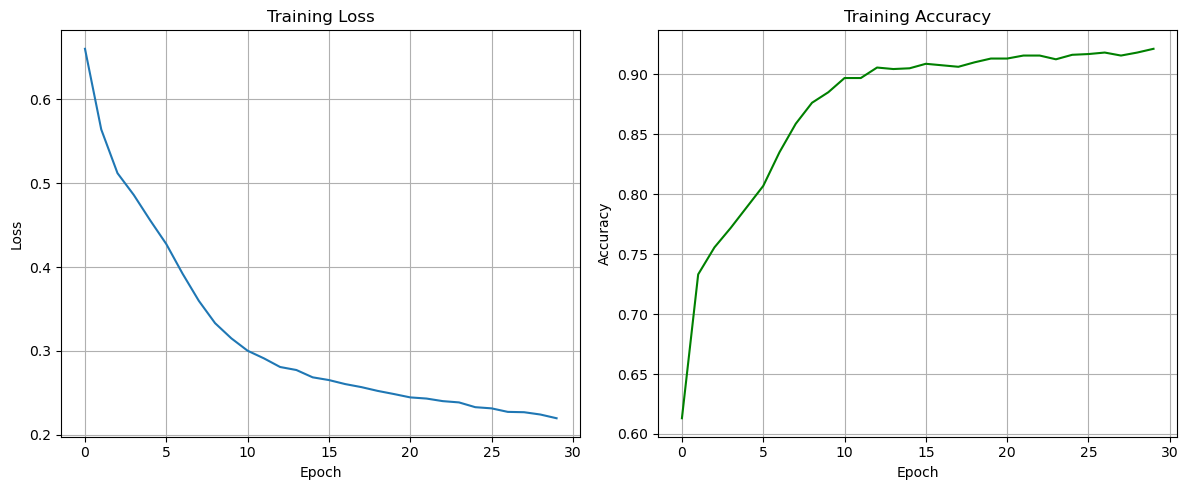

In [18]:
# --- 모델 정의 ---
class BPClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

model = BPClassifier()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# --- 학습 루프 ---
epochs = 30
train_loss_history = []
train_acc_history = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0
    
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        predicted = (outputs.detach().numpy() > 0.5).astype(int)
        correct += (predicted == y_batch.numpy()).sum()
        total += y_batch.size(0)

    avg_loss = epoch_loss / len(train_loader)
    accuracy = correct / total
    train_loss_history.append(avg_loss)
    train_acc_history.append(accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

# --- 테스트 예측 및 F1-score ---
model.eval()
with torch.no_grad():
    y_pred_prob = model(X_test_tensor).numpy()
    y_pred = (y_pred_prob > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

print(f"\nTest Accuracy: {acc:.4f}")
print(f"Test F1 Score: {f1:.4f}")

# --- 시각화 ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label='Accuracy', color='green')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()